# Sales Data Analysis- Tejasvee Dwivedi

### Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
sales=pd.read_csv("sales.csv")
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


### Identifying missing or null values

In [3]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [4]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### General Insights

In [6]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### Product category and sum of Total for each

In [7]:
sales_by_product = sales.groupby('Product line')['Total'].sum()
sales_by_product

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [8]:
avg_rate=np.mean(sales['Rating'])
avg_rate

np.float64(6.9727)

### Product category and their average rating

In [9]:
rate_by_product = sales.groupby('Product line')['Rating'].mean()
rate_by_product

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64

### Gender Ratio

In [10]:
gender= sales['Gender'].value_counts()
gender

Gender
Female    501
Male      499
Name: count, dtype: int64

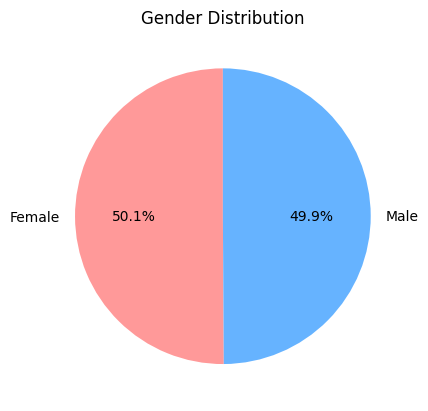

In [11]:
gender_counts = sales['Gender'].value_counts()
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, legend=False, colors=['#FF9999', '#66B3FF'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

### Average rating by each gender

In [12]:
rate_by_gender = sales.groupby('Gender')['Rating'].mean()
rate_by_gender

Gender
Female    6.964471
Male      6.980962
Name: Rating, dtype: float64

### Mode of payment

In [13]:
mode_pay= sales['Payment'].value_counts()
print(mode_pay)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


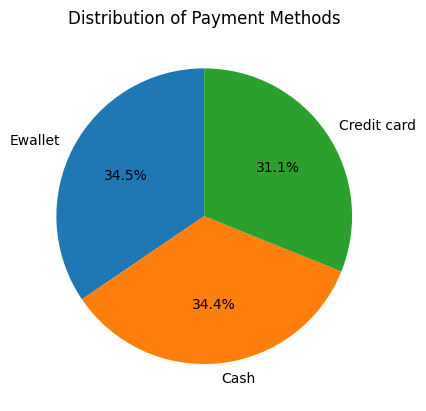

In [14]:
payment_counts = sales['Payment'].value_counts()
payment_counts.plot.pie(autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.show()

### Product category total count

In [15]:
product_line_counts = sales['Product line'].value_counts()
product_line_counts

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

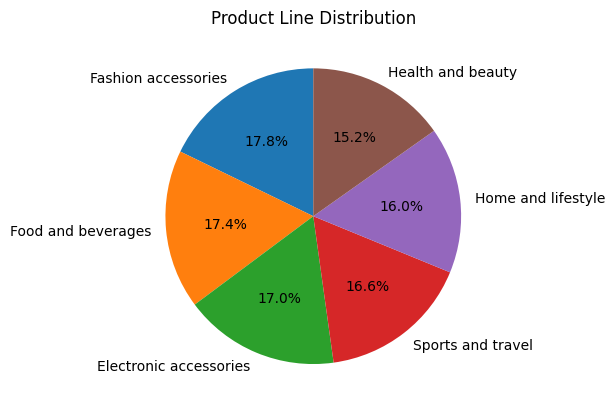

In [16]:
product_line_counts.plot.pie(autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Product Line Distribution')
plt.ylabel('')
plt.show()

### Product categoryt with mean tax

In [17]:
avg_tax = sales.groupby('Product line')['Tax 5%'].mean()
print(avg_tax)

Product line
Electronic accessories    15.220597
Fashion accessories       14.528062
Food and beverages        15.365310
Health and beauty         15.411572
Home and lifestyle        16.030331
Sports and travel         15.812630
Name: Tax 5%, dtype: float64


In [18]:
print(sales['Date'].head())

0    01-05-2019
1    03-08-2019
2    03-03-2019
3     1/27/2019
4    02-08-2019
Name: Date, dtype: object


### Count of orders in each city

In [20]:
city= sales['City'].value_counts()
city

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

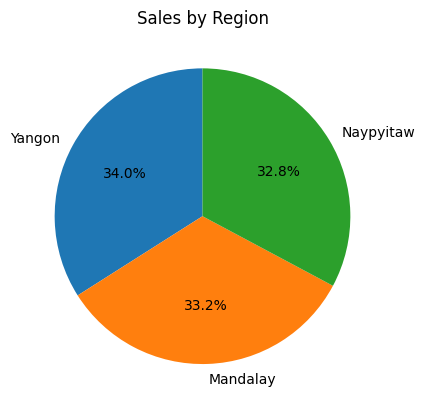

In [21]:
region_sales = sales['City'].value_counts()
region_sales.plot.pie(autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Sales by Region')
plt.ylabel('')
plt.show()

### Customer type

In [22]:
cust_type= sales['Customer type'].value_counts()
cust_type

Customer type
Member    501
Normal    499
Name: count, dtype: int64

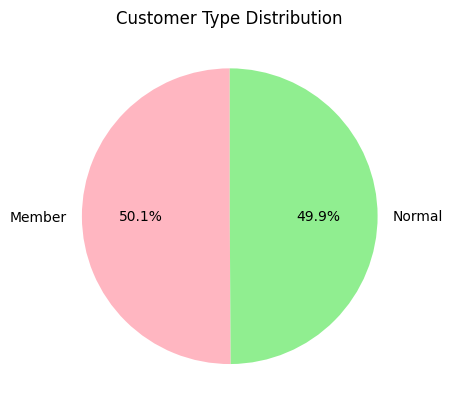

In [23]:
customer_type_counts = sales['Customer type'].value_counts()
customer_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, legend=False, colors=['#FFB6C1', '#90EE90'])
plt.title('Customer Type Distribution')
plt.ylabel('')
plt.show()

### Relational insights including gender, customer type, mode of payment & product category

In [24]:
customer_gender_count = sales.groupby(['Gender', 'Customer type']).size().reset_index(name='Count')
print(customer_gender_count)

   Gender Customer type  Count
0  Female        Member    261
1  Female        Normal    240
2    Male        Member    240
3    Male        Normal    259


In [25]:
prod_gender = sales.groupby(['Gender', 'Product line']).size().reset_index(name='Count')
female_prod = prod_gender[prod_gender['Gender'] == 'Female']
print(female_prod)

   Gender            Product line  Count
0  Female  Electronic accessories     84
1  Female     Fashion accessories     96
2  Female      Food and beverages     90
3  Female       Health and beauty     64
4  Female      Home and lifestyle     79
5  Female       Sports and travel     88


In [26]:
male_prod = prod_gender[prod_gender['Gender'] == 'Male']
print(male_prod)

   Gender            Product line  Count
6    Male  Electronic accessories     86
7    Male     Fashion accessories     82
8    Male      Food and beverages     84
9    Male       Health and beauty     88
10   Male      Home and lifestyle     81
11   Male       Sports and travel     78


In [27]:
mode_payment_by_gender = sales.groupby('Gender')['Payment'].agg(lambda x: x.mode()[0]).reset_index()
print(mode_payment_by_gender)

   Gender  Payment
0  Female     Cash
1    Male  Ewallet


## Some more graphical representations

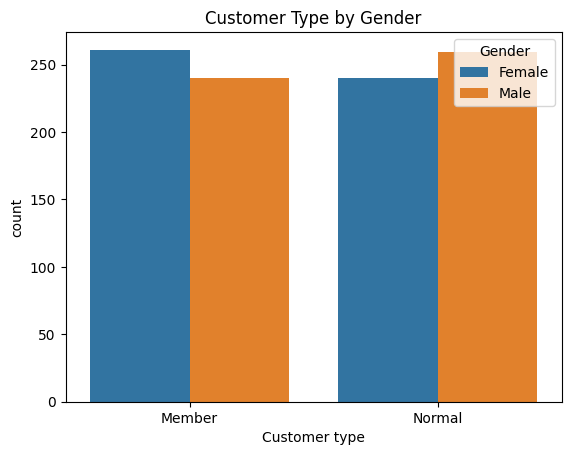

In [28]:
sb.countplot(data=sales, x='Customer type', hue='Gender')
plt.title('Customer Type by Gender')
plt.show()

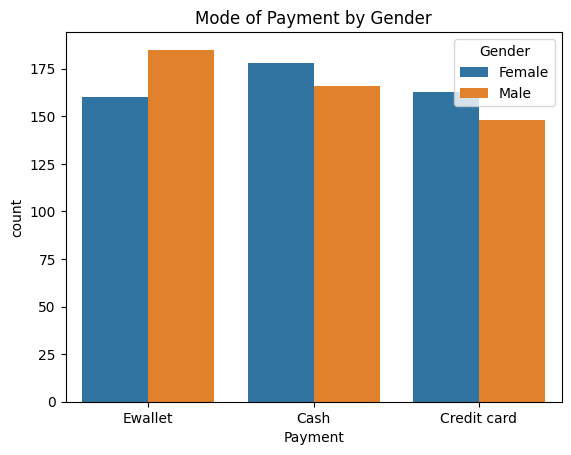

In [29]:
sb.countplot(data=sales, x='Payment', hue='Gender')
plt.title('Mode of Payment by Gender')
plt.show()

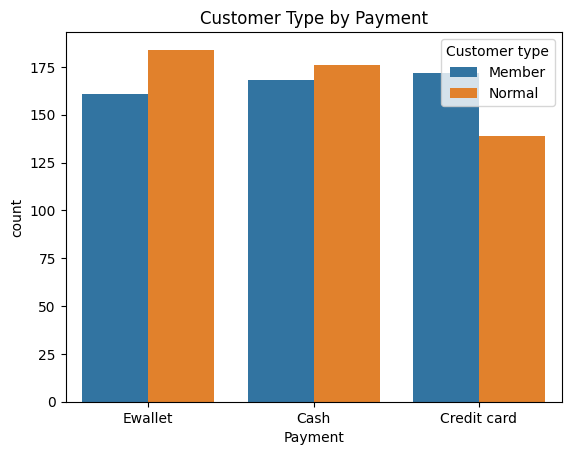

In [30]:
sb.countplot(data=sales, x='Payment', hue='Customer type')
plt.title('Customer Type by Payment')
plt.show()

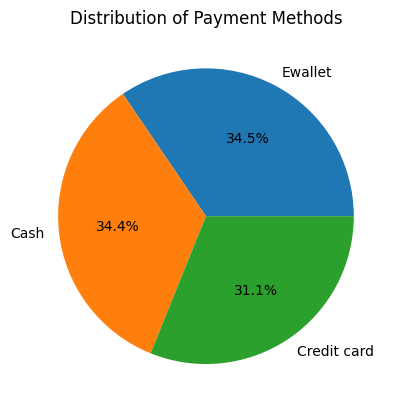

In [31]:
payment_counts = sales['Payment'].value_counts()
payment_counts.plot.pie(autopct='%1.1f%%', legend=False)
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.show()

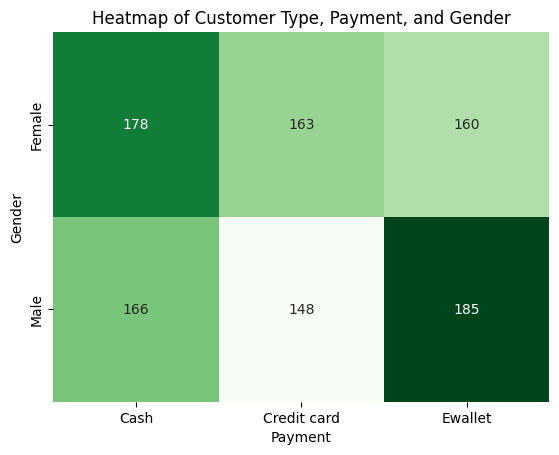

In [32]:
pivot_table = sales.pivot_table(index='Gender', columns='Payment', values='Customer type', aggfunc='count', fill_value=0)

sb.heatmap(pivot_table, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Heatmap of Customer Type, Payment, and Gender')
plt.show()

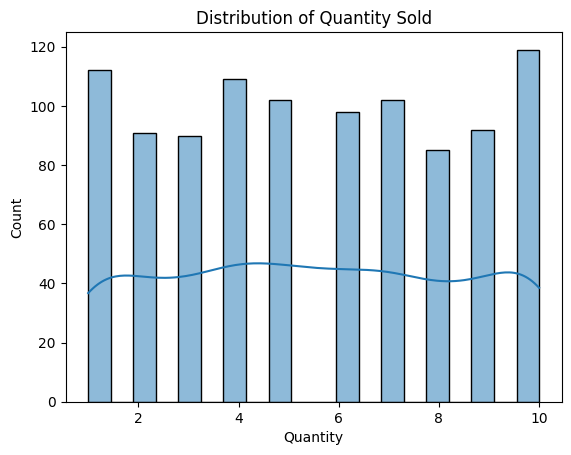

In [33]:
sb.histplot(sales['Quantity'], bins=20, kde=True)
plt.title('Distribution of Quantity Sold')
plt.show()

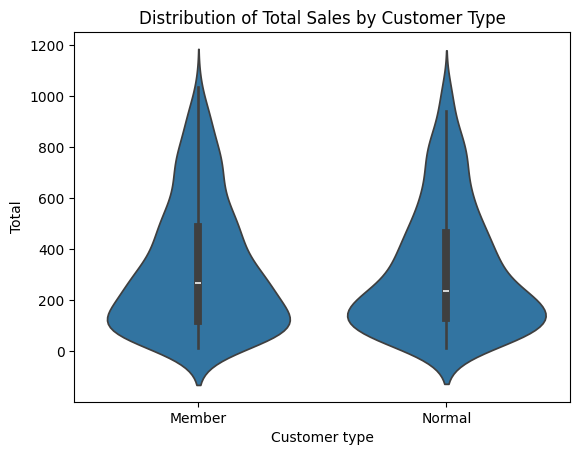

In [34]:
sb.violinplot(data=sales, x='Customer type', y='Total')
plt.title('Distribution of Total Sales by Customer Type')
plt.show()

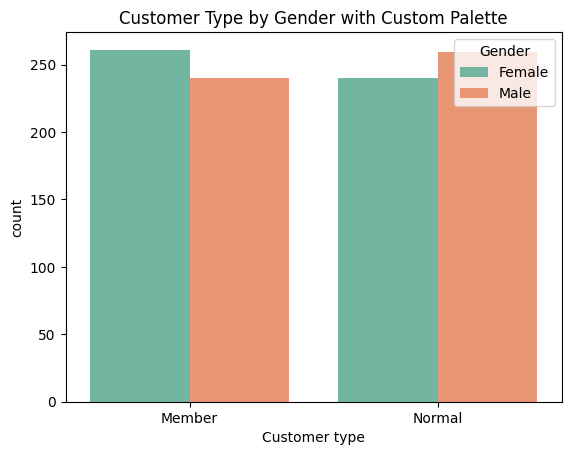

In [35]:
sb.countplot(data=sales, x='Customer type', hue='Gender', palette='Set2')
plt.title('Customer Type by Gender with Custom Palette')
plt.show()

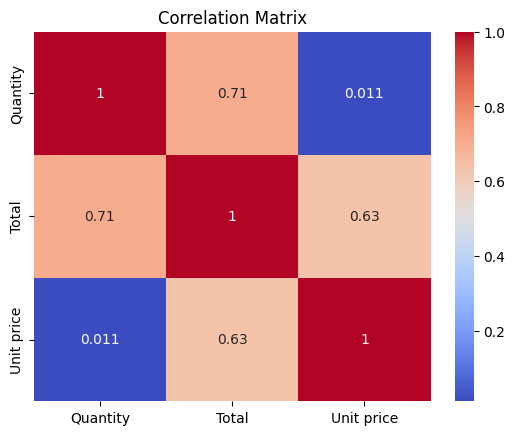

In [36]:
correlation = sales[['Quantity', 'Total', 'Unit price']].corr()
sb.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

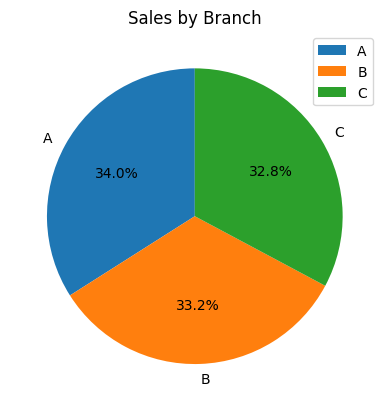

In [37]:
branch_sales = sales['Branch'].value_counts()
branch_sales.plot.pie(autopct='%1.1f%%', startangle=90, legend=True)
plt.title('Sales by Branch')
plt.ylabel('')
plt.show()